In [26]:
!pip install tensorflow

In [27]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    try:
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
    except RuntimeError as e:
        print(e)
else:
    print("No GPU detected. Running on CPU.")

No GPU detected. Running on CPU.


In [7]:
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Reproducability
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed()

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore") # to clean up output cells


# Load training and validation sets
ds_train_ = image_dataset_from_directory(
     r'C:\Users\serik\OneDrive\car or truck\train',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)
ds_valid_ = image_dataset_from_directory(
     r'C:\Users\serik\OneDrive\car or truck\valid',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)

# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

Found 5117 files belonging to 2 classes.
Found 5051 files belonging to 2 classes.


In [9]:
!pip install tensorflow-hub

     ------------------------------------ 100.6/100.6 kB 525.1 kB/s eta 0:00:00


In [11]:
import tensorflow_hub as hub

pretrained_base = tf.keras.models.load_model(
    r'C:\Users\serik\OneDrive\cvmodels\cv-course-models\inceptionv1'
)

In [28]:
pretrained_base.trainable = True

In [29]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    pretrained_base,
    layers.Flatten(),
    layers.Dense(6, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [30]:
optimizer = tf.keras.optimizers.Adam(epsilon=0.01)
model.compile(
    optimizer=optimizer,
    loss = 'binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [31]:
history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=30,
)

Epoch 1/30
80/80 [==============================] - 121s 1s/step - loss: 0.3604 - binary_accuracy: 0.8343 - val_loss: 0.2047 - val_binary_accuracy: 0.9192
Epoch 2/30
80/80 [==============================] - 112s 1s/step - loss: 0.1955 - binary_accuracy: 0.9224 - val_loss: 0.4642 - val_binary_accuracy: 0.8038
Epoch 3/30
80/80 [==============================] - 108s 1s/step - loss: 0.1554 - binary_accuracy: 0.9384 - val_loss: 0.2271 - val_binary_accuracy: 0.9137
Epoch 4/30
80/80 [==============================] - 113s 1s/step - loss: 0.0677 - binary_accuracy: 0.9717 - val_loss: 0.1981 - val_binary_accuracy: 0.9319
Epoch 5/30
80/80 [==============================] - 110s 1s/step - loss: 0.0961 - binary_accuracy: 0.9613 - val_loss: 0.1941 - val_binary_accuracy: 0.9258
Epoch 6/30
80/80 [==============================] - 113s 1s/step - loss: 0.0990 - binary_accuracy: 0.9609 - val_loss: 0.1282 - val_binary_accuracy: 0.9529
Epoch 7/30
80/80 [==============================] - 113s 1s/step - los

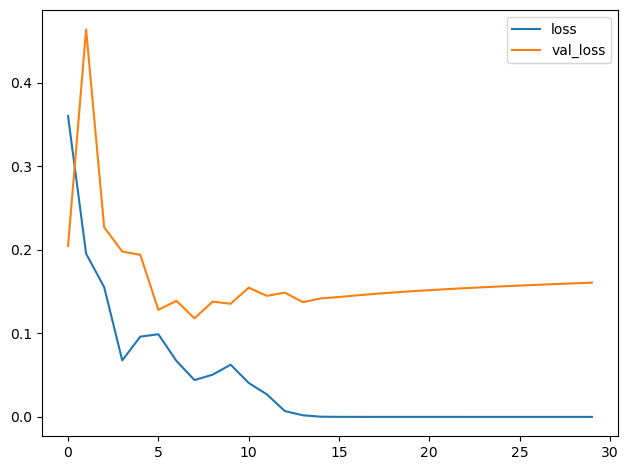

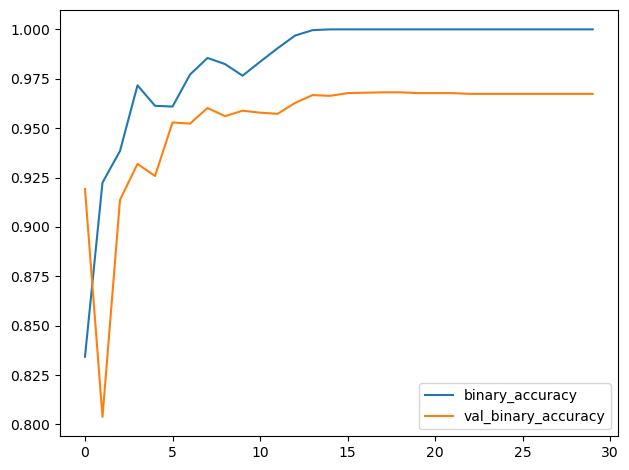

In [34]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();